In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
sns.set()
%matplotlib inline

In [9]:
df = pd.read_excel("../data/saeb-2015.xlsx")

In [10]:
df.shape

(24479, 58)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50200dfe80>,
      dtype=object)

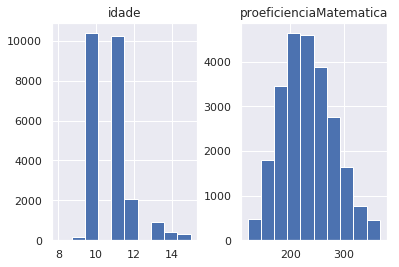

In [35]:
df.hist(column=['idade', 'proeficienciaMatematica'])